In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. 读取数据集
2. 对训练集做可视化
3. 特征工程
4. 模型&预测
5. 模型融合

## 1.读取数据集

In [2]:
data_train = pd.read_csv('../../data/titanic/train.csv')
data_test = pd.read_csv('../../data/titanic/test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.对训练集做可视化

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


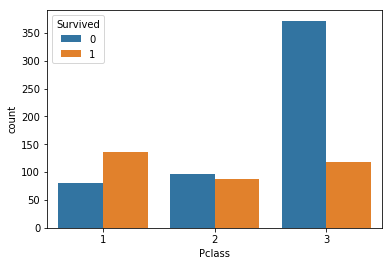

In [4]:
sns.countplot(data=data_train, x='Pclass', hue='Survived')

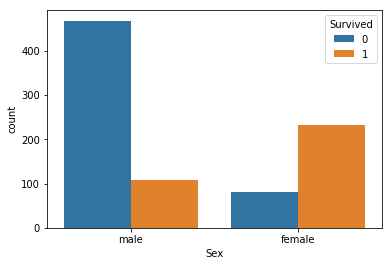

In [5]:
sns.countplot(data=data_train, x='Sex', hue='Survived')

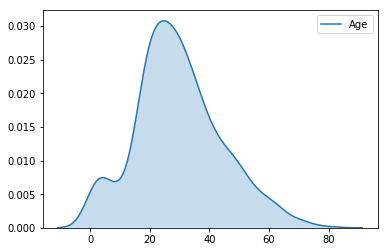

In [9]:
# 查看年龄分布
sns.kdeplot(data=data_train[data_train.Age.notnull()]['Age'],shade=True)

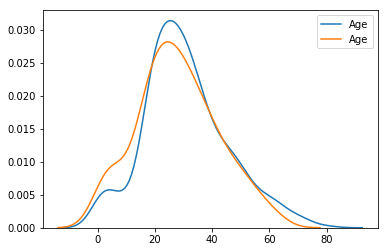

In [13]:
# 查看男女年龄分布
df_age_notnull = data_train[data_train['Age'].notnull()]
age_series_male = df_age_notnull[df_age_notnull['Sex'] == 'male']['Age']
age_series_female = df_age_notnull[df_age_notnull['Sex'] == 'female']['Age']
sns.kdeplot(data=age_series_male)
sns.kdeplot(data=age_series_female)

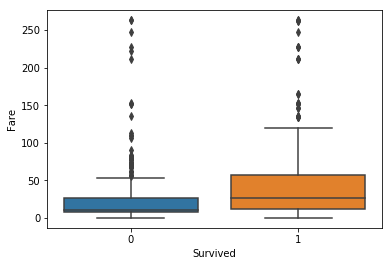

In [17]:
# 票价分布
sns.boxplot(data=data_train[data_train['Fare'] < 500], x='Survived', y='Fare')

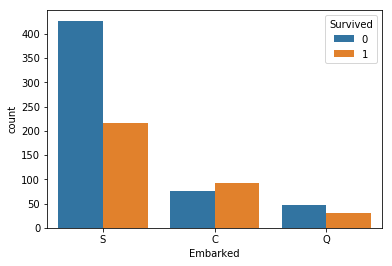

In [20]:
sns.countplot(data=data_train, x='Embarked', hue='Survived')

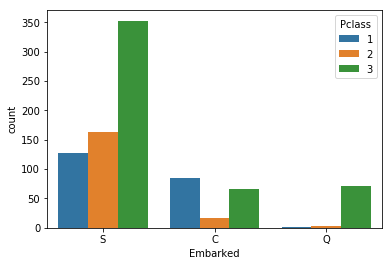

In [22]:
sns.countplot(data=data_train, x='Embarked', hue='Pclass')

## 3.特征工程

1. 合并训练集/测试集
2. 数据补全（均值/众数）
3. Pclass, Sex, Embarked onehot编码
4. 名字中提取称谓
5. 年龄离散化，创造新特征：小孩/老人
6. 票号中提取仓名
7. onehot处理称谓/离散化年龄/仓名
8. 分离训练集/测试集
9. 标准化Fare/Age

In [29]:
data_test['Survived'] = 0
# 这样写，是否data_train在前，data_test在后
data = pd.concat(objs=[data_train, data_test], axis=0)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB
